### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [9]:
import tensorflow as tf
tf.set_random_seed(42)

In [10]:
tf.__version__

'1.13.1'

### Collect Data

In [11]:
import keras

In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [6]:
print(testY[0:5])

[9 2 1 1 6]


In [52]:
trainX.shape

(60000, 28, 28)

In [41]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

We have 10 different classes

In [32]:
import numpy as np
np.unique(trainY)

array([0., 1.], dtype=float32)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [12]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [13]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

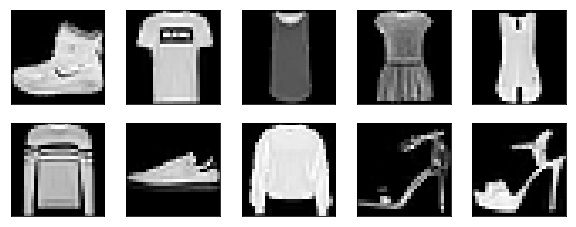

In [74]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i],cmap='gray')
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [56]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model using model.fit()

In [57]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 6s 105us/sample - loss: 14.5063 - acc: 0.1

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [58]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [59]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 13us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3401 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 0s 8us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3398 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 0s 8us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3394 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 1s 8us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3390 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3386 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3383 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 1s 8us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3379 -

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [61]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [62]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3365 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 0s 6us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3361 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 0s 6us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3358 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 0s 8us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3355 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3351 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3348 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3345 -

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [63]:
model.add(tf.keras.layers.Dense(100, activation='softmax'))

In [64]:

model.add(tf.keras.layers.Dense(100, activation='softmax'))

In [65]:

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [66]:
#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 10)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total para

In [69]:
model.fit(trainX,trainY,          
          validation_data=(trainX,trainY),
          epochs=15)

Train on 60000 samples, validate on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 259us/sample - loss: 2.3027 - acc: 0.1012 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/15
60000/60000 [==============================] - 12s 206us/sample - loss: 2.3027 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/15
60000/60000 [==============================] - 15s 244us/sample - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/15
60000/60000 [==============================] - 13s 217us/sample - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/15
60000/60000 [==============================] - 14s 240us/sample - loss: 2.3027 - acc: 0.1003 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/15
60000/60000 [==============================] - 17s 276us/sample - loss: 2.3027 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/15
60000/60000 [==============================] - 14s 241us/sample - loss: 2.3027 - acc: 0.0988 

### Run the model

In [71]:
pred = model.predict(testX)
pred

array([[0.10057095, 0.09937337, 0.09909425, ..., 0.09999639, 0.10035347,
        0.10028248],
       [0.10057095, 0.09937337, 0.09909425, ..., 0.09999639, 0.10035347,
        0.10028248],
       [0.10057095, 0.09937337, 0.09909425, ..., 0.09999639, 0.10035347,
        0.10028248],
       ...,
       [0.10057095, 0.09937337, 0.09909425, ..., 0.09999639, 0.10035347,
        0.10028248],
       [0.10057095, 0.09937337, 0.09909425, ..., 0.09999639, 0.10035347,
        0.10028248],
       [0.10057095, 0.09937337, 0.09909425, ..., 0.09999639, 0.10035347,
        0.10028248]], dtype=float32)

In [73]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3025950145721437
Test accuracy: 0.1
